In [5]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import os
import random
os.chdir('/Users/pratiksharma/Documents/major project IPBA')
data = pd.read_csv('accident_data.csv')
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [6]:
data.head()



,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No


In [7]:

data.shape

(1048575, 34)

In [8]:
#Check information about datatype for individual columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

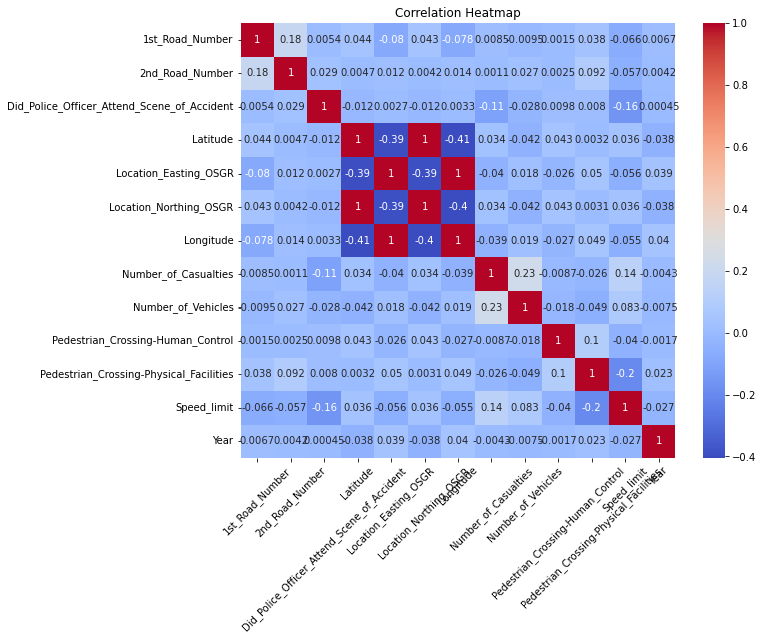

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Add a title
plt.title('Correlation Heatmap')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Data Preparation and Cleaning
Load data using pandas
Look at some information about data and contained features
Fixing any missing values

In [10]:
# get statistical summaries for numerical columns
data.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
count,1.048573e+06,1.037772e+06,1.048306e+06,1.048464e+06,1.048464e+06,1.048464e+06,1.048463e+06,1.048575e+06,1.048575e+06,1.048554e+06,1.048538e+06,1.048575e+06,1.048575e+06
mean,1.011997e+03,3.870004e+02,1.198669e+00,5.257297e+01,4.383077e+05,2.983130e+05,-1.454537e+00,1.359930e+00,1.835030e+00,9.291844e-03,6.793955e-01,3.943654e+01,2.007328e+03
std,1.832042e+03,1.316673e+03,4.062626e-01,1.424463e+00,9.479292e+04,1.581757e+05,1.391890e+00,8.223645e-01,7.181454e-01,1.267232e-01,1.749380e+00,1.431206e+01,1.690220e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,4.991443e+01,6.495000e+04,1.052000e+04,-7.516225e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,2.005000e+03
25%,0.000000e+00,0.000000e+00,1.000000e+00,5.149244e+01,3.752200e+05,1.784700e+05,-2.371331e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.006000e+03
50%,1.250000e+02,0.000000e+00,1.000000e+00,5.234314e+01,4.377000e+05,2.729300e+05,-1.435624e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.007000e+03
75%,7.060000e+02,0.000000e+00,1.000000e+00,5.346407e+01,5.211600e+05,3.965500e+05,-2.446045e-01,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,2.009000e+03
max,9.999000e+03,9.999000e+03,3.000000e+00,6.075754e+01,6.555400e+05,1.208800e+06,1.762010e+00,6.800000e+01,3.200000e+01,2.000000e+00,8.000000e+00,7.000000e+01,2.010000e+03


In [9]:
# Drop columns with large number of NAs

drops = ['2nd_Road_Class', 'InScotland', 'Special_Conditions_at_Site','LSOA_of_Accident_Location']
data.drop(columns=drops, inplace=True)

In [11]:
#get count of numberical columns
len(data.describe())

8

In [12]:
# check outliers:
# - if mean significantly below median, we have outliers on the left of chart.
# - if mean significantly above median, we have outliers on the right of chart.
data.describe().loc[["mean", "50%"], :]

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
mean,1011.997007,387.000433,1.198669,52.572970,438307.694984,298312.981282,-1.454537,1.35993,1.83503,0.009292,0.679396,39.436535,2007.328374
50%,125.000000,0.000000,1.000000,52.343142,437700.000000,272930.000000,-1.435624,1.00000,2.00000,0.000000,0.000000,30.000000,2007.000000


# Check null values

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer


In [14]:
data_subset=data
data_subset

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,200501BS00001,A,3218.0,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,...,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,30,17:42,Urban,Raining no high winds,2005
1,200501BS00002,B,450.0,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,...,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,30,17:36,Urban,Fine no high winds,2005
2,200501BS00003,C,0.0,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,...,0.0,0.0,Metropolitan Police,Dry,Single carriageway,30,00:15,Urban,Fine no high winds,2005
3,200501BS00004,A,3220.0,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,...,0.0,0.0,Metropolitan Police,Dry,Single carriageway,30,10:35,Urban,Fine no high winds,2005
4,200501BS00005,NaN,0.0,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,...,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,30,21:13,Urban,Fine no high winds,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,A,95.0,0.0,Slight,None,18/02/2010,Thursday,1.0,Data missing or out of range,...,0.0,0.0,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,2010
1048571,201091NM01881,A,95.0,0.0,Slight,None,21/02/2010,Sunday,1.0,Data missing or out of range,...,0.0,0.0,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,2010
1048572,201091NM01935,A,96.0,0.0,Slight,None,23/02/2010,Tuesday,1.0,Give way or uncontrolled,...,0.0,0.0,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,2010
1048573,201091NM01964,A,9.0,0.0,Serious,None,23/02/2010,Tuesday,1.0,Give way or uncontrolled,...,0.0,0.0,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,2010


In [15]:
#identify categorical and numeric features
cat_cols=data_subset.select_dtypes('object').columns
num_cols=data_subset.select_dtypes('number').columns
#drop accident_severity bcuz it will be 

In [16]:
#identify columns containing more than 5 percent missing data
cat_cols_morethan_5=[var for var in data_subset.columns if data_subset[var].isnull().mean() > 0.05 and data_subset[var].dtype=="object" ]
num_cols_morethan_5=[var for var in data_subset.columns if data_subset[var].isnull().mean() > 0.05 and data_subset[var].dtype=="int" or data_subset[var].dtype=="float"]

num_cols_morethan_5


['1st_Road_Number',
 '2nd_Road_Number',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Latitude',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities']

In [17]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

ct = ColumnTransformer([
    ('Cat_Imputer', SimpleImputer(strategy='constant', fill_value='Data Missing'),cat_cols_morethan_5),
    ('Num_Imputer', SimpleImputer(strategy='mean'),num_cols_morethan_5),
    ('OrdinalEncoder', OrdinalEncoder(categories=[['Slight','Serious','Fatal']]),['Accident_Severity']),

])
null_sum = data_subset.isnull().sum()
null_sum

Accident_Index                                      0
1st_Road_Class                                 305589
1st_Road_Number                                     2
2nd_Road_Number                                 10803
Accident_Severity                                   0
Carriageway_Hazards                                29
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       269
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          111
Light_Conditions                                 2084
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             111
Location_Northing_OSGR                            111
Longitude                                         112
Number_of_Casualties        

In [18]:
percentage_na = data.isna().sum().sort_values(ascending=False)*100/len(data)
percentage_na

1st_Road_Class                                 29.143266
Weather_Conditions                              2.040102
2nd_Road_Number                                 1.030255
Road_Type                                       0.692940
Light_Conditions                                0.198746
Road_Surface_Conditions                         0.113392
Did_Police_Officer_Attend_Scene_of_Accident     0.025654
Longitude                                       0.010681
Location_Easting_OSGR                           0.010586
Location_Northing_OSGR                          0.010586
Latitude                                        0.010586
Time                                            0.009537
Urban_or_Rural_Area                             0.008106
Pedestrian_Crossing-Physical_Facilities         0.003529
Carriageway_Hazards                             0.002766
Pedestrian_Crossing-Human_Control               0.002003
1st_Road_Number                                 0.000191
Police_Force                   

In [19]:
print(data.columns)

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Year'],
      dtype='object')


In [20]:
 #Assuming your DataFrame is named 'df' and the column with null values is 'categorical_column'
data_subset['Road_Surface_Conditions'] = data_subset['Road_Surface_Conditions'].fillna('Data Missing')
data_subset['Light_Conditions'] = data_subset['Light_Conditions'].fillna('Data Missing')
data_subset['Road_Type'] = data_subset['Road_Type'].fillna('Data Missing')
data_subset['Urban_or_Rural_Area'] = data_subset['Urban_or_Rural_Area'].fillna('Data Missing')
data_subset['Weather_Conditions'] = data_subset['Weather_Conditions'].fillna('Data Missing')

data_subset['Carriageway_Hazards'] = data_subset['Carriageway_Hazards'].fillna('Data Missing')
data_subset['1st_Road_Class'] = data_subset['1st_Road_Class'].fillna('Data Missing')

In [21]:
#mean_value1 =data_subset ['Longitude'].mean()
#data_subset['Longitude'] = data_subset['Longitude'].fillna(mean_value1)

mean_value =data_subset ['Did_Police_Officer_Attend_Scene_of_Accident'].mean()
data_subset['Did_Police_Officer_Attend_Scene_of_Accident'] = data_subset['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(mean_value)

mean_value1 = data_subset['Longitude'].mean()
data_subset['Longitude'] = data_subset['Longitude'].fillna(mean_value1)

mean_value2 = data_subset['Location_Easting_OSGR'].mean()
data_subset['Location_Easting_OSGR'] = data_subset['Location_Easting_OSGR'].fillna(mean_value2)

mean_value3 = data_subset['Location_Northing_OSGR'].mean()
data_subset['Location_Northing_OSGR'] = data_subset['Location_Northing_OSGR'].fillna(mean_value3)

mean_value4 = data_subset['Pedestrian_Crossing-Human_Control'].mean()
data_subset['Pedestrian_Crossing-Human_Control'] = data_subset['Pedestrian_Crossing-Human_Control'].fillna(mean_value4)

mean_value5 = data_subset['Pedestrian_Crossing-Physical_Facilities'].mean()
data_subset['Pedestrian_Crossing-Physical_Facilities'] = data_subset['Pedestrian_Crossing-Physical_Facilities'].fillna(mean_value5)






In [22]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the column with null values
mean_value =data_subset ['Latitude'].mean()
data_subset['Latitude'] = data_subset['Latitude'].fillna(mean_value)

In [23]:
cat_cols

Index(['Accident_Index', '1st_Road_Class', 'Accident_Severity',
       'Carriageway_Hazards', 'Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Light_Conditions', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions'],
      dtype='object')

In [24]:
num_cols

Index(['1st_Road_Number', '2nd_Road_Number',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit', 'Year'],
      dtype='object')

In [28]:
 data_subset.isnull().sum()



Accident_Index                                     0
1st_Road_Class                                     0
1st_Road_Number                                    2
2nd_Road_Number                                10803
Accident_Severity                                  0
Carriageway_Hazards                                0
Date                                               0
Day_of_Week                                        0
Did_Police_Officer_Attend_Scene_of_Accident        0
Junction_Control                                   0
Junction_Detail                                    0
Latitude                                           0
Light_Conditions                                   0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Number_of_Casualties                          

In [26]:
# check outliers:
# - if mean significantly below median, we have outliers on the left of chart.
# - if mean significantly above median, we have outliers on the right of chart.
data_subset.describe().loc[["mean", "50%"], :]

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
mean,1011.997007,387.000433,1.198669,52.572970,438307.694984,298312.981282,-1.454537,1.35993,1.83503,0.009292,0.679396,39.436535,2007.328374
50%,125.000000,0.000000,1.000000,52.343443,437710.000000,272970.000000,-1.435791,1.00000,2.00000,0.000000,0.000000,30.000000,2007.000000


In [27]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               1048575 non-null  object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Number                              1037772 non-null  float64
 4   Accident_Severity                            1048575 non-null  object 
 5   Carriageway_Hazards                          1048575 non-null  object 
 6   Date                                         1048575 non-null  object 
 7   Day_of_Week                                  1048575 non-null  object 
 8   Did_Police_Officer_Attend_Scene_of_Accident  1048575 non-null  float64
 9   Junction_Control                             1

In [30]:
data_subset.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
count,1.048573e+06,1.037772e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.011997e+03,3.870004e+02,1.198669e+00,5.257297e+01,4.383077e+05,2.983130e+05,-1.454537e+00,1.359930e+00,1.835030e+00,9.291844e-03,6.793955e-01,3.943654e+01,2.007328e+03
std,1.832042e+03,1.316673e+03,4.062105e-01,1.424387e+00,9.478790e+04,1.581673e+05,1.391816e+00,8.223645e-01,7.181454e-01,1.267219e-01,1.749349e+00,1.431206e+01,1.690220e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,4.991443e+01,6.495000e+04,1.052000e+04,-7.516225e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,2.005000e+03
25%,0.000000e+00,0.000000e+00,1.000000e+00,5.149247e+01,3.752300e+05,1.784700e+05,-2.371120e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.006000e+03
50%,1.250000e+02,0.000000e+00,1.000000e+00,5.234344e+01,4.377100e+05,2.729700e+05,-1.435791e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.007000e+03
75%,7.060000e+02,0.000000e+00,1.000000e+00,5.346401e+01,5.211500e+05,3.965400e+05,-2.446500e-01,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,2.009000e+03
max,9.999000e+03,9.999000e+03,3.000000e+00,6.075754e+01,6.555400e+05,1.208800e+06,1.762010e+00,6.800000e+01,3.200000e+01,2.000000e+00,8.000000e+00,7.000000e+01,2.010000e+03


# Correlation And Hypothesis Testing

## Continous variables-

### Pearson correlation test for continous variable

##### H0=The null hypothesis states that there is no significant association between the variables. if p < 0.05 we reject null hypothesis
##### H1= The alternative hypothesis states that there is a significant association between the variable 

In [32]:
data_subset.corr(method="pearson")

/var/folders/j0/51zpbs2518903pm53gm9dx_00000gn/T/ipykernel_39910/3856819142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_subset.corr(method="pearson")


,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
1st_Road_Number,1.000000,0.184469,0.005398,0.043532,-0.079667,0.042655,-0.077725,0.008524,-0.009509,0.001533,0.037933,-0.065760,0.006729
2nd_Road_Number,0.184469,1.000000,0.028693,0.004728,0.012434,0.004183,0.013618,0.001125,0.026530,0.002507,0.092466,-0.056553,0.004213
Did_Police_Officer_Attend_Scene_of_Accident,0.005398,0.028693,1.000000,-0.011847,0.002746,-0.012059,0.003282,-0.109035,-0.027768,0.009815,0.007997,-0.161739,0.000451
Latitude,0.043532,0.004728,-0.011847,1.000000,-0.394526,0.999972,-0.405038,0.033791,-0.042110,0.043143,0.003162,0.035719,-0.038335
Location_Easting_OSGR,-0.079667,0.012434,0.002746,-0.394526,1.000000,-0.392532,0.999370,-0.040186,0.017833,-0.025969,0.050420,-0.056232,0.038939
Location_Northing_OSGR,0.042655,0.004183,-0.012059,0.999972,-0.392532,1.000000,-0.403141,0.033637,-0.042337,0.043198,0.003067,0.036049,-0.038401
Longitude,-0.077725,0.013618,0.003282,-0.405038,0.999370,-0.403141,1.000000,-0.039017,0.019169,-0.027216,0.049166,-0.055261,0.040053
Number_of_Casualties,0.008524,0.001125,-0.109035,0.033791,-0.040186,0.033637,-0.039017,1.000000,0.226377,-0.008702,-0.025633,0.136949,-0.004314
Number_of_Vehicles,-0.009509,0.026530,-0.027768,-0.042110,0.017833,-0.042337,0.019169,0.226377,1.000000,-0.017948,-0.049181,0.082855,-0.007507
Pedestrian_Crossing-Human_Control,0.001533,0.002507,0.009815,0.043143,-0.025969,0.043198,-0.027216,-0.008702,-0.017948,1.000000,0.100501,-0.040332,-0.001682


###  Correlation Between Latitude and Location Northing OSGR

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mstats

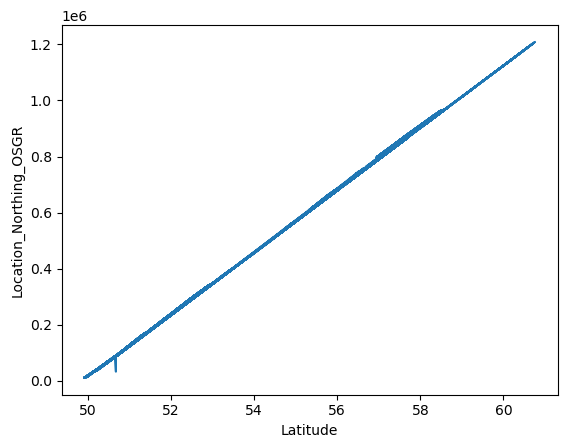

In [36]:
first_sample=data_subset['Latitude']
second_sample=data_subset['Location_Northing_OSGR']

plt.plot(first_sample,second_sample)
plt.xlabel('Latitude')
plt.ylabel('Location_Northing_OSGR')
plt.show()

### Pearson Test

In [37]:
from scipy.stats import pearsonr

x = data_subset['Latitude']
y = data_subset['Location_Northing_OSGR']

corr_coeff, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: 0.9999721739479414
p-value: 0.0


The correlation coefficient is approximately 0.9999721739479414, which is very close to +1. This value suggests an extremely strong positive linear relationship between the two variables. 
A p-value of 0.0 (or very close to 0) implies that the probability of obtaining such a strong correlation by chance is virtually impossible.

Hence we can delete Location Northing OSGR from the data set for the model building part.

#### We reject Null hypothesis here as P-value is less than .05

##  Correlation between Longitude and Location_Easting_OSGR


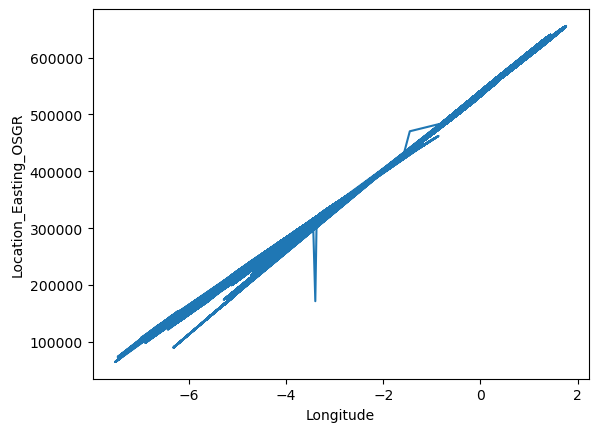

In [38]:
first_sample2=data_subset['Longitude']
second_sample2=data_subset['Location_Easting_OSGR']

plt.plot(first_sample2,second_sample2)
plt.xlabel('Longitude')
plt.ylabel('Location_Easting_OSGR')
plt.show()

### Pearson test

In [40]:
from scipy.stats import pearsonr

x = data_subset['Longitude']
y = data_subset['Location_Easting_OSGR']

corr_coeff, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: 0.9993696490183622
p-value: 0.0


Given the Correlation coefficient: 0.9993696490183622 , the p-value of 0.0, , it can be concluded that there is a highly significant association between the continous variables under consideration. The extremely small p-value suggests that the observed data is highly unlikely to occur by chance alone, indicating a strong evidence against the null hypothesis of no association.

Hence we can delete Location Easting OSGR from the data set for the model building part.

#### We reject Null hypothesis here as P-value is less than .05

## Correlation Between Number_of_Casualties and Number_of_Vehicles

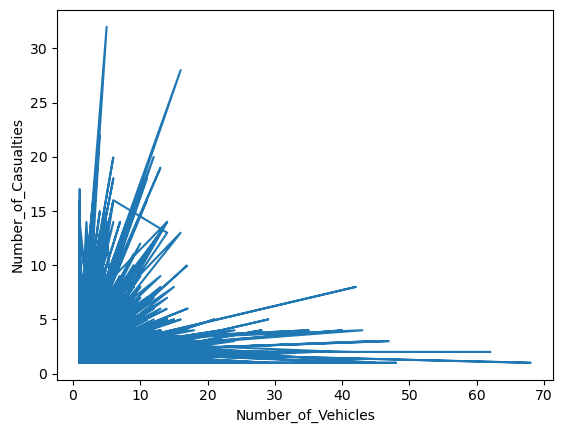

In [41]:
first_sample=data_subset['Number_of_Casualties']
second_sample=data_subset['Number_of_Vehicles']

plt.plot(first_sample,second_sample)
plt.xlabel('Number_of_Vehicles')
plt.ylabel('Number_of_Casualties')
plt.show()

### Pearson Test

In [43]:
from scipy.stats import pearsonr

x = data_subset['Number_of_Casualties']
y = data_subset['Number_of_Vehicles']

corr_coeff, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: 0.22637651788977858
p-value: 0.0


The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the coefficient is positive, indicating a positive correlation between the variables.

However, it's important to note that a p-value of 0.0 is highly unlikely and is typically rounded down to 0 for practical purposes. A p-value of 0 indicates that the observed correlation is statistically significant and is unlikely to have occurred by chance alone. It suggests strong evidence to reject the null hypothesis that there is no correlation between the variables.

## Correlation Map Between Pedestrian_Crossing-Human_Control and Pedestrian_Crossing-Physical_Facilities

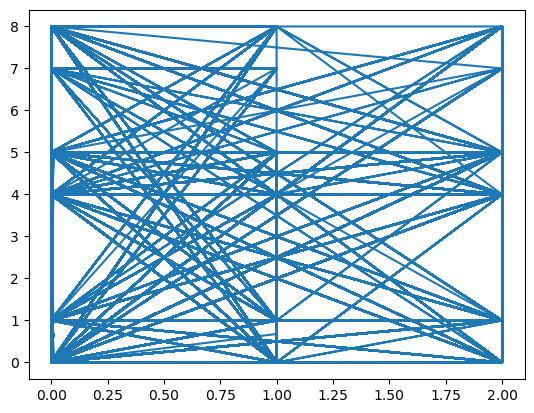

In [44]:
first_sample=data_subset['Pedestrian_Crossing-Human_Control']
second_sample=data_subset['Pedestrian_Crossing-Physical_Facilities']

plt.plot(first_sample,second_sample)
plt.show()

### Pearson Test

In [46]:
from scipy.stats import pearsonr

x = data_subset['Pedestrian_Crossing-Human_Control']
y = data_subset['Pedestrian_Crossing-Physical_Facilities']

corr_coeff, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: 0.10050141664034791
p-value: 0.0


The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient is 0.10050141664034791. Since the value is positive, it indicates a positive relationship between the variables. However, the magnitude of the correlation coefficient (0.1) suggests a relatively weak relationship

The p-value of 0.0 indicates that the observed correlation is statistically significant.

A p-value of 0.0 means that the probability of observing such a strong correlation by chance alone is extremely low

It's important to note that while the correlation is statistically significant, the effect size (as indicated by the magnitude of the correlation coefficient) suggests a weak relationship. This means that although there is a statistical association between the variables, the strength of the relationship is not very strong.

# Chi- Squared Test for Categorical variable

 Null hypothesis (H₀): The null hypothesis states that there is no association between the variables.
 
 
 Alternative hypothesis (H₁):The alternative hypothesis states that there is a significant association between the variable
 
 If P-value is less than 0.05 we reject the Null Hypothesis




## Variable Taken '1st_Road_Class' and 'Accident_Severity'

#### Assumption- independent observation, size in each box of contingency table is >25

In [48]:
contingency_data = pd.crosstab(data_subset['1st_Road_Class'],data_subset['Accident_Severity'],margins = False)

In [49]:
contingency_data

Accident_Severity,Fatal,Serious,Slight
1st_Road_Class,,,
A,8042,62952,399860
A(M),57,323,2293
B,2065,18982,112132
C,1227,12762,79994
Data Missing,2313,39027,264249
Motorway,796,4146,37355


A:-main recommended route these can be  single carriageway or dual carriageway. The primary road network is fully connected, meaning you can reach any part from any other without leaving the network.

A(m):-Some A Roads also have primary status (e.g., A1(M), A3(M)), which indicates higher importance and often includes sections built to motorway standards.

B:- Regional in nature and used to connect areas of lesser importance. 

C:-C roads are used as local authority designations for routes within their area for administrative purposes. These routes are not shown on small-scale road maps, but have occasionally been known to appear on road signs.

Motorway:- Motorways are high-capacity roads designed for fast and uninterrupted traffic flow. 


<Axes: xlabel='1st_Road_Class'>

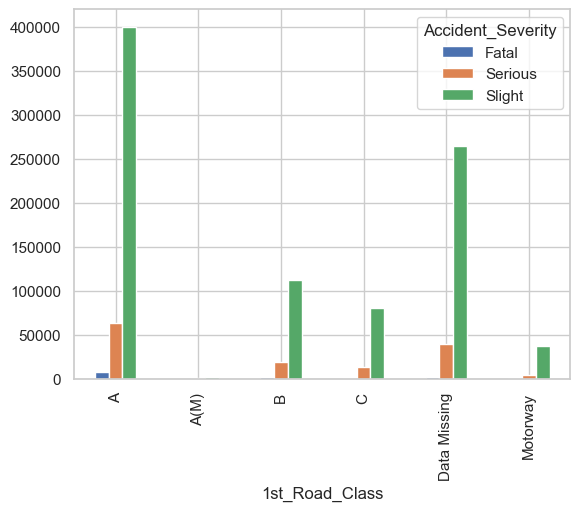

In [50]:
sns.set(style='whitegrid')
contingency_data.plot(kind='bar')



In [51]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = stats.chi2_contingency(contingency_data)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 2011.0423372684024
P-value: 0.0
Degrees of freedom: 10
Expected frequencies: [[6.51110602e+03 6.20539837e+04 4.02288910e+05]
 [3.69630212e+01 3.52275437e+02 2.28376154e+03]
 [1.84163794e+03 1.75516986e+04 1.13785663e+05]
 [1.29962425e+03 1.23860465e+04 8.02973292e+04]
 [4.22577355e+03 4.02736620e+04 2.61089564e+05]
 [5.84895215e+02 5.57433376e+03 3.61377710e+04]]


Given the chi-square statistic of 2011.0423372684024, the p-value of  0.0, and 10 degrees of freedom, it can be concluded that there is a highly significant association between the categorical variables under consideration. 
The extremely small p-value suggests that the observed data is highly unlikely to occur by chance alone, indicating a strong evidence against the null hypothesis of no association.

The chi-square test is used to determine if there is a significant association between two categorical variables. The test compares the observed frequencies (actual data) with the expected frequencies (what would be expected if there were no association).

In a chi-square test, the observed frequencies are the actual counts or frequencies of occurrences in each category or cell of a contingency table. These are the values obtained from the data you have collected or observed.

A higher chi-square value indicates a larger discrepancy and suggests a stronger association between the variables.

The p-value associated with the chi-square test indicates the probability of observing such a large discrepancy (or larger) under the null hypothesis of independence. A low p-value suggests that the observed association between the variables is statistically significant and not likely due to chance.



## Junction_Control and Junction_Detail

In [53]:
contingency_data1 = pd.crosstab(data_subset['Junction_Control'],data_subset['Junction_Detail'],margins = False)
contingency_data1

Junction_Detail,Crossroads,Data missing or out of range,Mini-roundabout,More than 4 arms (not roundabout),Not at junction or within 20 metres,Other junction,Private drive or entrance,Roundabout,Slip road,T or staggered junction
Junction_Control,,,,,,,,,,
Authorised person,219,0,25,51,3,326,86,299,71,758
Auto traffic sigl,2,0,0,0,11,272,49,1,0,3
Auto traffic signal,48682,0,152,9101,2,3729,345,9343,934,33212
Data missing or out of range,3,10,0,1,352445,313,1069,7,4,19
Give way or uncontrolled,47447,0,9784,6258,51,29504,35501,78835,14472,281132
Not at junction or within 20 metres,0,0,0,0,76916,0,0,0,0,0
Stop sign,2103,0,39,142,0,389,82,447,87,3839


<Axes: xlabel='Junction_Control'>

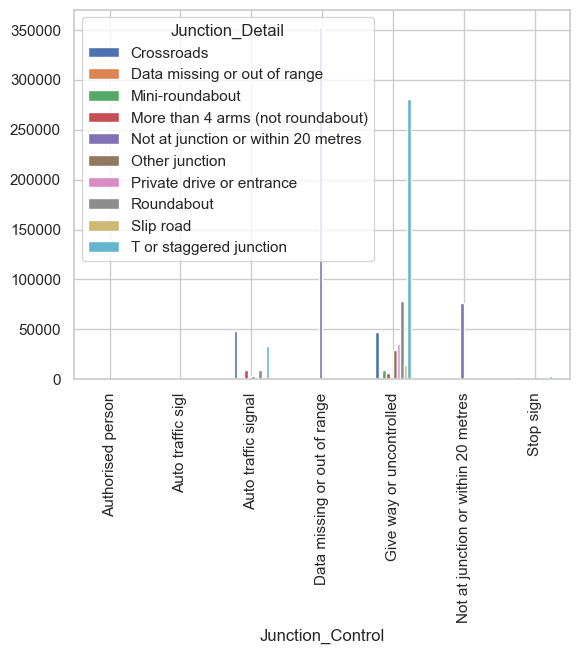

In [67]:
contingency_data1.plot(kind='bar')

In [54]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data1)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1249499.5659626063
P-value: 0.0
Degrees of freedom: 54
Expected frequencies: [[1.72579098e+02 1.75285507e-02 1.75285507e+01 2.72621548e+01
  7.52725045e+02 6.05313440e+01 6.50870143e+01 1.55884907e+02
  2.72884477e+01 5.59095910e+02]
 [3.17365262e+01 3.22342226e-03 3.22342226e+00 5.01338865e+00
  1.38422778e+02 1.11314441e+01 1.19692115e+01 2.86665389e+01
  5.01822378e+00 1.02815244e+02]
 [9.90592757e+03 1.00612736e+00 1.00612736e+03 1.56482989e+03
  4.32059261e+04 3.47445962e+03 3.73595213e+03 8.94769187e+03
  1.56633908e+03 3.20917402e+04]
 [3.32267345e+04 3.37478006e+00 3.37478006e+03 5.24879543e+03
  1.44922505e+05 1.16541280e+04 1.25312333e+04 3.00125940e+04
  5.25385760e+03 1.07642997e+05]
 [4.72277068e+04 4.79683380e+00 4.79683380e+03 7.46051561e+03
  2.05989474e+05 1.65649062e+04 1.78116033e+04 4.26592023e+04
  7.46771086e+03 1.53001250e+05]
 [7.22203152e+03 7.33528837e-01 7.33528837e+02 1.14085740e+03
  3.14997821e+04 2.53309513e+03 2.72373928e+03 6.52341

The chi-square statistic measures the discrepancy between the observed frequencies in the contingency table and the expected frequencies assuming independence between the variables. In this case, the chi-square statistic is extremely large, indicating a significant deviation from the expected frequencies.

the p-value of 0.0 suggests that the observed deviation is highly unlikely to have occurred by chance alone, assuming independence. A p-value of 0.0 means that the probability of obtaining such extreme results or a more significant association between the variables, assuming independence, is essentially impossible.

The degrees of freedom (df) in a chi-square test refer to the number of categories minus 1 for each variable in the contingency table. In this case, with 54 degrees of freedom, it implies that there are 54 categories (cells) in the contingency table for the analysis.

In conclusion, the provided chi-square statistic, p-value, and degrees of freedom indicate a highly significant association between the variables being analyzed.



## Accident Severity and Junction_Details

In [57]:
contingency_data12 = pd.crosstab(data_subset['Accident_Severity'],data_subset['Junction_Detail'],margins = False)

In [58]:
contingency_data12

Junction_Detail,Crossroads,Data missing or out of range,Mini-roundabout,More than 4 arms (not roundabout),Not at junction or within 20 metres,Other junction,Private drive or entrance,Roundabout,Slip road,T or staggered junction
Accident_Severity,,,,,,,,,,
Fatal,804,0,38,104,9295,330,373,304,244,3008
Serious,11709,0,862,1751,65976,3876,4824,6957,1649,40588
Slight,85943,10,9100,13698,354157,30327,31935,81671,13675,275367


<Axes: xlabel='Accident_Severity'>

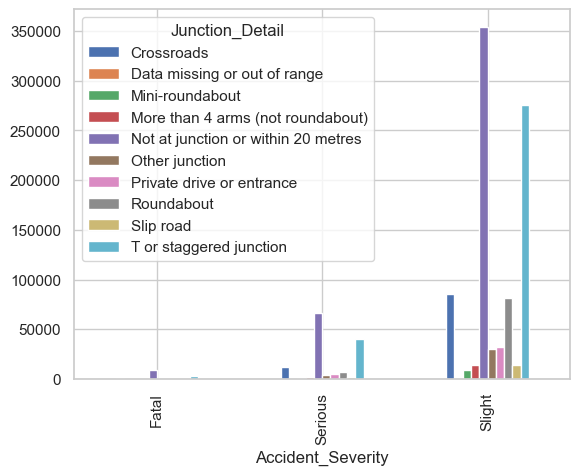

In [60]:
contingency_data12.plot(kind='bar')

In [61]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data12)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 8555.750929603008
P-value: 0.0
Degrees of freedom: 18
Expected frequencies: [[1.36147820e+03 1.38282908e-01 1.38282908e+02 2.15071406e+02
  5.93825525e+03 4.77532365e+02 5.13472093e+02 1.22977756e+03
  2.15278831e+02 4.41071311e+03]
 [1.29755445e+04 1.31790287e+00 1.31790287e+03 2.04973433e+03
  5.65944393e+04 4.55111397e+03 4.89363693e+03 1.17203738e+04
  2.05171119e+03 4.20362253e+04]
 [8.41189773e+04 8.54381422e+00 8.54381422e+03 1.32881943e+04
  3.66895305e+05 2.95043537e+04 3.17248910e+04 7.59818487e+04
  1.33010100e+04 2.72516062e+05]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 8555.750929603008.

The p-value associated with the chi-square statistic is 0.0, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 18, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

## Junction_Control and Light_Conditions

In [62]:
contingency_data3 = pd.crosstab(data_subset['Junction_Control'],data_subset['Light_Conditions'],margins = False)

In [63]:
contingency_data3

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Data Missing,Daylight
Junction_Control,,,,,,
Authorised person,21,308,8,38,4,1459
Auto traffic sigl,6,76,1,4,0,251
Auto traffic signal,722,30953,371,188,660,72606
Data missing or out of range,3717,60052,1533,37980,532,250057
Give way or uncontrolled,4324,104874,2118,12592,887,378189
Not at junction or within 20 metres,515,10409,245,9775,0,55972
Stop sign,67,1300,40,218,1,5502


<Axes: xlabel='Junction_Control'>

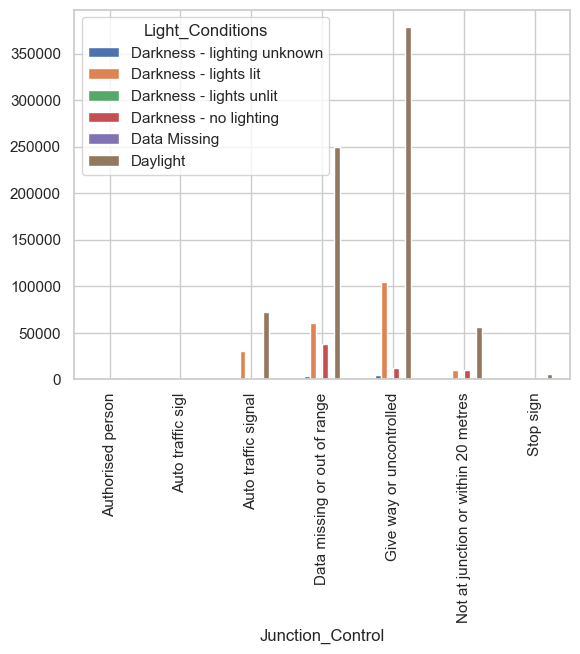

In [65]:
contingency_data3.plot(kind='bar')

In [68]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data3)

In [69]:
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 46899.72803360815
P-value: 0.0
Degrees of freedom: 30
Expected frequencies: [[1.64277577e+01 3.64544774e+02 7.56532246e+00 1.06564824e+02
  3.65294996e+00 1.33924437e+03]
 [3.02099135e+00 6.70381575e+01 1.39122905e+00 1.95967957e+01
  6.71761200e-01 2.46281065e+02]
 [9.42942565e+02 2.09246320e+04 4.34244570e+02 6.11675131e+03
  2.09676943e+02 7.68717526e+04]
 [3.16284387e+03 7.01859758e+04 1.45655507e+03 2.05169754e+04
  7.03304164e+02 2.57845346e+05]
 [4.49559264e+03 9.97607119e+04 2.07031347e+03 2.91623511e+04
  9.99660164e+02 3.66495371e+05]
 [6.87463226e+02 1.52553459e+04 3.16591046e+02 4.45948856e+03
  1.52867410e+02 5.60442438e+04]
 [6.37089536e+01 1.41375144e+03 2.93392919e+01 4.13272069e+02
  1.41666090e+01 5.19376164e+03]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 46899.72803360815.

The p-value associated with the chi-square statistic is 0.0, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 30, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

## Road surface Condition and road type

In [70]:
contingency_data4 = pd.crosstab(data_subset['Road_Surface_Conditions'],data_subset['Road_Type'],margins = False)

In [71]:
contingency_data4

Road_Type,Data Missing,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
Road_Surface_Conditions,,,,,,
Data Missing,12,121,46,143,858,9
Dry,5457,106295,16503,48340,528369,7406
Flood over 3cm. deep,9,444,5,27,963,10
Frost or ice,108,2984,256,1010,19282,217
Snow,40,1145,94,272,5823,77
Wet or damp,1640,47547,5276,19139,225364,3284


<Axes: xlabel='Road_Surface_Conditions'>

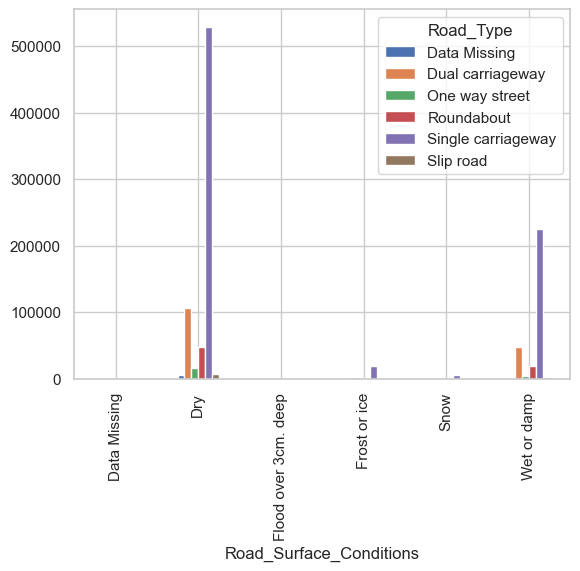

In [72]:
contingency_data4.plot(kind='bar')

In [73]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data4)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1796.7211473638527
P-value: 0.0
Degrees of freedom: 25
Expected frequencies: [[8.23906158e+00 1.79767116e+02 2.51503421e+01 7.81622287e+01
  8.85204731e+02 1.24765200e+01]
 [4.93629966e+03 1.07704542e+05 1.50684182e+04 4.68296273e+04
  5.30356009e+05 7.47510394e+03]
 [1.01030713e+01 2.20437725e+02 3.08403691e+01 9.58456934e+01
  1.08547393e+03 1.52992146e+01]
 [1.65314796e+02 3.60698410e+03 5.04635586e+02 1.56830638e+03
  1.77614208e+04 2.50338384e+02]
 [5.16309906e+01 1.12653052e+03 1.57607401e+02 4.89812251e+02
  5.54723335e+03 7.81854927e+01]
 [2.09441242e+03 4.56977384e+04 6.39334812e+03 1.98692461e+04
  2.25023659e+05 3.17159645e+03]]


The chi-square test is used to determine if there is a significant association between two categorical variables. The test compares the observed frequencies (actual data) with the expected frequencies (what would be expected if there were no association).

In a chi-square test, the observed frequencies are the actual counts or frequencies of occurrences in each category or cell of a contingency table. These are the values obtained from the data you have collected or observed.

A higher chi-square value indicates a larger discrepancy and suggests a stronger association between the variables.

The p-value associated with the chi-square test indicates the probability of observing such a large discrepancy (or larger) under the null hypothesis of independence. A low p-value suggests that the observed association between the variables is statistically significant and not likely due to chance.



## Accident_Severity and Road_Surface_Conditions

In [74]:
contingency_data5 = pd.crosstab(data_subset['Accident_Severity'],data_subset['Road_Surface_Conditions'],margins = False)

In [75]:
contingency_data5

Road_Surface_Conditions,Data Missing,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
Accident_Severity,,,,,,
Fatal,7,9657,35,248,53,4500
Serious,118,96228,202,2660,728,38256
Slight,1064,606485,1221,20949,6670,259494


<Axes: xlabel='Accident_Severity'>

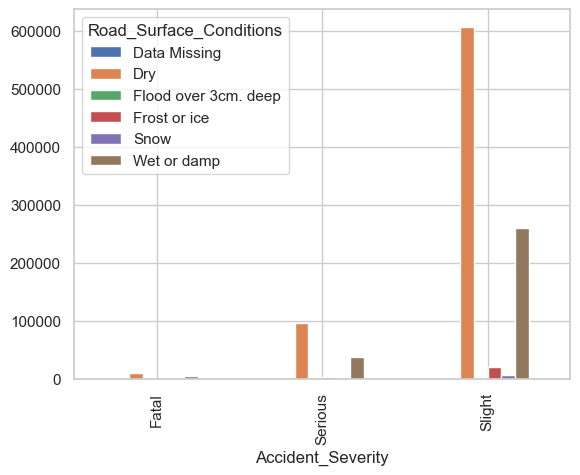

In [76]:
contingency_data5.plot(kind='bar')

In [77]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data5)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 407.39785676458285
P-value: 2.5060692007649286e-81
Degrees of freedom: 10
Expected frequencies: [[1.64418377e+01 9.85085950e+03 2.01616480e+01 3.29901533e+02
  1.03034595e+02 4.17960089e+03]
 [1.56698651e+02 9.38834466e+04 1.92150238e+02 3.14412087e+03
  9.81969427e+02 3.98336142e+04]
 [1.01585951e+03 6.08635694e+05 1.24568811e+03 2.03829776e+04
  6.36599598e+03 2.58236785e+05]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 407.39785676458285.

The p-value associated with the chi-square statistic is 2.5060692007649286e-81, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 10, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

## Accident_Severity and Road_Type

In [78]:
contingency_data6 = pd.crosstab(data_subset['Accident_Severity'],data_subset['Road_Type'],margins = False)

In [79]:
contingency_data6

Road_Type,Data Missing,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
Accident_Severity,,,,,,
Fatal,54,3012,156,239,10948,91
Serious,762,18666,2681,5614,109525,944
Slight,6450,136858,19343,63078,660186,9968


<Axes: xlabel='Accident_Severity'>

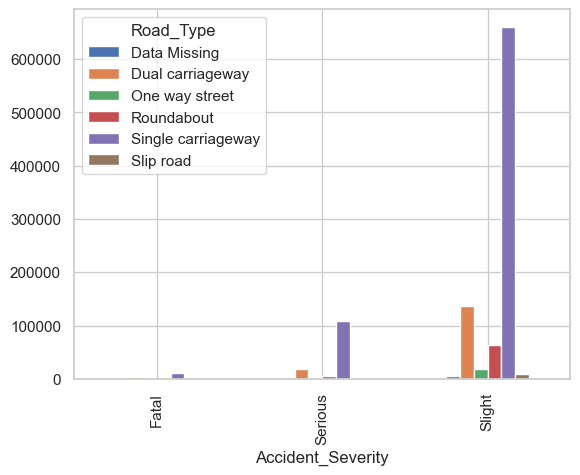

In [80]:
contingency_data6.plot(kind='bar')

In [81]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data6)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 3625.5626159954377
P-value: 0.0
Degrees of freedom: 10
Expected frequencies: [[1.00476361e+02 2.19228191e+03 3.06711489e+02 9.53197911e+02
  1.07951796e+04 1.52152683e+02]
 [9.57588224e+02 2.08935049e+04 2.92310856e+03 9.08443626e+03
  1.02883274e+05 1.45008853e+03]
 [6.20793542e+03 1.35450213e+05 1.89501799e+04 5.88933658e+04
  6.66980547e+05 9.40075879e+03]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 3625.5626159954377.

The p-value associated with the chi-square statistic is 0.0, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 10, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

## Urban or Rural Area and Weather conditions

In [82]:
contingency_data7 = pd.crosstab(data_subset['Urban_or_Rural_Area'],data_subset['Weather_Conditions'],margins = False)

In [83]:
contingency_data7

Weather_Conditions,Data Missing,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Urban_or_Rural_Area,,,,,,,,,
Data Missing,5,0,66,1,3,1,7,2,0
Rural,6266,6373,291029,3987,11170,7241,49426,852,4206
Unallocated,1,2,42,0,1,0,12,0,0
Urban,15120,7179,539946,2063,15312,7455,76039,432,4336


<Axes: xlabel='Urban_or_Rural_Area'>

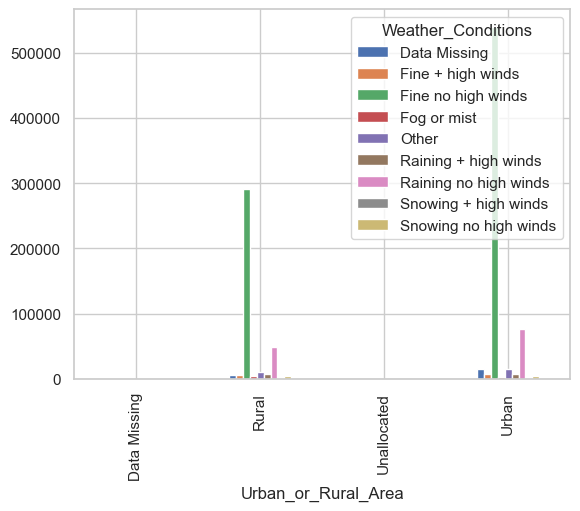

In [84]:
contingency_data7.plot(kind='bar')

In [85]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data7)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 7163.294307498696
P-value: 0.0
Degrees of freedom: 24
Expected frequencies: [[1.73408674e+00 1.09871969e+00 6.73695778e+01 4.90508547e-01
  2.14701857e+00 1.19137401e+00 1.01720335e+01 1.04246239e-01
  6.92434971e-01]
 [7.76360833e+03 4.91903269e+03 3.01617563e+05 2.19603562e+03
  9.61232845e+03 5.33385151e+03 4.55407922e+04 4.66716544e+02
  3.10007210e+03]
 [1.18325919e+00 7.49714613e-01 4.59698295e+01 3.34699950e-01
  1.46502444e+00 8.12937558e-01 6.94091696e+00 7.11327277e-02
  4.72485039e-01]
 [1.36254743e+04 8.63311888e+03 5.29352098e+05 3.85413917e+03
  1.68700595e+04 9.36114418e+03 7.99260948e+04 8.19108077e+02
  5.44076298e+03]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 7163.29430749869.

The p-value associated with the chi-square statistic is 0.0, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 24, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

## Road_Type and Urban_or_Rural_Area

In [87]:
contingency_data8 = pd.crosstab(data_subset['Road_Type'],data_subset['Urban_or_Rural_Area'],margins = False)

In [88]:
contingency_data8

Urban_or_Rural_Area,Data Missing,Rural,Unallocated,Urban
Road_Type,,,,
Data Missing,7,2104,2,5153
Dual carriageway,14,77855,4,80663
One way street,3,2020,3,20154
Roundabout,0,24384,9,44538
Single carriageway,61,267542,40,513016
Slip road,0,6645,0,4358


<Axes: xlabel='Road_Type'>

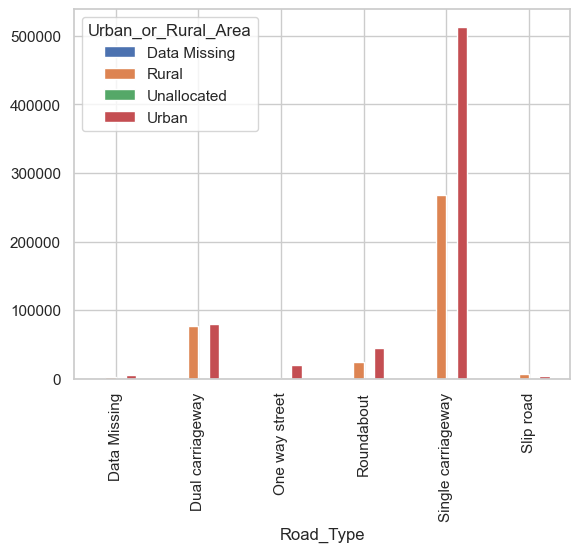

In [89]:
contingency_data8.plot(kind='bar')

In [90]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data8)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 22781.726327116863
P-value: 0.0
Degrees of freedom: 15
Expected frequencies: [[5.88999356e-01 2.63698477e+03 4.01905443e-01 4.62802433e+03]
 [1.28513077e+01 5.75360607e+04 8.76912763e+00 1.00978319e+05]
 [1.79796390e+00 8.04959016e+03 1.22684596e+00 1.41273850e+04]
 [5.58771189e+00 2.50165148e+04 3.81279165e+00 4.39050847e+04]
 [6.32820876e+01 2.83317629e+05 4.31807186e+01 4.97234909e+05]
 [8.91929523e-01 3.99322094e+03 6.08610734e-01 7.00827852e+03]]


the statistical significance of the association between the "Road_Type" and "Urban_or_Rural_Area" variables. The p-value indicates the probability of observing the data if the two variables were independent. If the p-value is below a chosen significance level (e.g., 0.05), it suggests evidence against the null hypothesis of independence.

The expected frequencies table shows the expected counts for each cell based on the assumption of independence between the variables.

## Road_Surface_Conditions and Weather conditions

In [91]:
contingency_data9 = pd.crosstab(data_subset['Road_Surface_Conditions'],data_subset['Weather_Conditions'],margins = False)

In [92]:
contingency_data9

Weather_Conditions,Data Missing,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Road_Surface_Conditions,,,,,,,,,
Data Missing,980,6,184,2,9,0,8,0,0
Dry,16791,7857,681527,775,4375,111,834,14,86
Flood over 3cm. deep,22,21,155,3,26,450,770,4,7
Frost or ice,300,246,13727,1041,5981,85,524,229,1724
Snow,66,24,1203,27,472,25,150,783,4701
Wet or damp,3233,5400,134287,4203,15623,14026,123198,256,2024


<Axes: xlabel='Road_Surface_Conditions'>

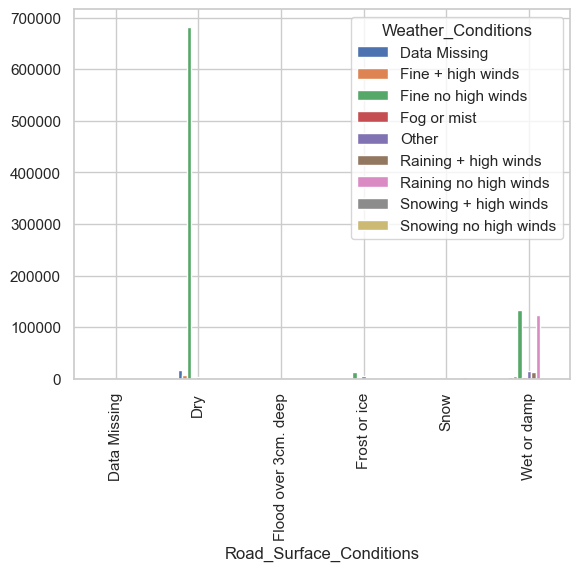

In [93]:
contingency_data9.plot(kind='bar')

In [94]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data9)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 976338.1778781443
P-value: 0.0
Degrees of freedom: 40
Expected frequencies: [[2.42568133e+01 1.53691496e+01 9.42381505e+02 6.86134897e+00
  3.00330010e+01 1.66652199e+01 1.42288798e+02 1.45822092e+00
  9.68594330e+00]
 [1.45330749e+04 9.20817584e+03 5.64612542e+05 4.11086557e+03
  1.79937838e+04 9.98469532e+03 8.52500175e+04 8.73669332e+02
  5.80317530e+03]
 [2.97446878e+01 1.88462742e+01 1.15558640e+03 8.41366426e+00
  3.68276833e+01 2.04355683e+01 1.74480292e+02 1.78812960e+00
  1.18772963e+01]
 [4.86707144e+02 3.08378302e+02 1.89086590e+04 1.37671323e+02
  6.02604966e+02 3.34383644e+02 2.85499062e+03 2.92588532e+01
  1.94346131e+02]
 [1.52008003e+02 9.63124755e+01 5.90553793e+03 4.29974022e+01
  1.88205122e+02 1.04434444e+02 8.91668487e+02 9.13810266e+00
  6.06980350e+01]
 [6.16620843e+03 3.90691796e+03 2.39558293e+05 1.74419069e+03
  7.63454545e+03 4.23638581e+03 3.61705543e+04 3.70687361e+02
  2.46221729e+03]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 976338.1778781443.

The p-value associated with the chi-square statistic is 0.0, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 40, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

## Accident_Severity and Weather_Conditions

In [95]:
contingency_data10 = pd.crosstab(data_subset['Accident_Severity'],data_subset['Weather_Conditions'],margins = False)

In [96]:
contingency_data10

Weather_Conditions,Data Missing,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Accident_Severity,,,,,,,,,
Fatal,207,277,11952,135,249,215,1396,10,59
Serious,1819,1966,113329,819,2725,1904,14685,160,785
Slight,19366,11311,705802,5097,23512,12578,109403,1116,7698


<Axes: xlabel='Accident_Severity'>

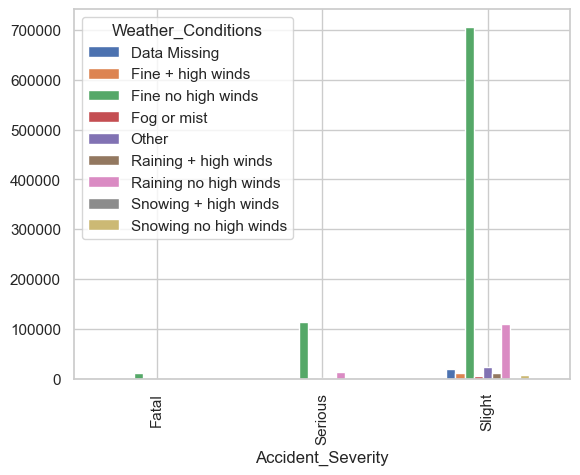

In [97]:
contingency_data10.plot(kind='bar')

In [98]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data10)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1441.1631516279551
P-value: 2.296058632237119e-297
Degrees of freedom: 16
Expected frequencies: [[2.95814796e+02 1.87428653e+02 1.14924574e+04 8.36749875e+01
  3.66256109e+02 2.03234390e+02 1.73522924e+03 1.77831819e+01
  1.18121260e+02]
 [2.81925782e+03 1.78628555e+03 1.09528667e+05 7.97463026e+02
  3.49059754e+03 1.93692185e+03 1.65375724e+04 1.69482309e+02
  1.12575263e+03]
 [1.82769274e+04 1.15802858e+04 7.10061876e+05 5.16986199e+03
  2.26291464e+04 1.25568438e+04 1.07211198e+05 1.09873451e+03
  7.29812611e+03]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 1441.1631516279551.

The p-value associated with the chi-square statistic is 2.296058632237119e-297, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 16, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

## Accident severity and Urban and Rural Roads

In [99]:
contingency_data11 = pd.crosstab(data_subset['Accident_Severity'],data_subset['Urban_or_Rural_Area'],margins = False)

In [100]:
contingency_data11

Urban_or_Rural_Area,Data Missing,Rural,Unallocated,Urban
Accident_Severity,,,,
Fatal,0,9383,0,5117
Serious,11,58679,8,79494
Slight,74,312488,50,583271


<Axes: xlabel='Accident_Severity'>

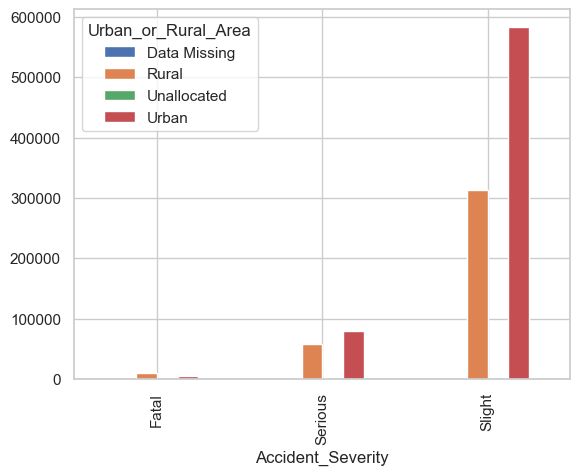

In [101]:
contingency_data11.plot(kind='bar')

In [102]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data12)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 8555.750929603008
P-value: 0.0
Degrees of freedom: 18
Expected frequencies: [[1.36147820e+03 1.38282908e-01 1.38282908e+02 2.15071406e+02
  5.93825525e+03 4.77532365e+02 5.13472093e+02 1.22977756e+03
  2.15278831e+02 4.41071311e+03]
 [1.29755445e+04 1.31790287e+00 1.31790287e+03 2.04973433e+03
  5.65944393e+04 4.55111397e+03 4.89363693e+03 1.17203738e+04
  2.05171119e+03 4.20362253e+04]
 [8.41189773e+04 8.54381422e+00 8.54381422e+03 1.32881943e+04
  3.66895305e+05 2.95043537e+04 3.17248910e+04 7.59818487e+04
  1.33010100e+04 2.72516062e+05]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 8555.750929603008.

The p-value associated with the chi-square statistic is 0.0, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 18, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

# Local Authority Analysis.

In [28]:
columns_to_analyze = ['Accident_Index','Accident_Severity','Date','Day_of_Week','Did_Police_Officer_Attend_Scene_of_Accident','Latitude','Longitude',
                      'Light_Conditions','Local_Authority_(District)','Number_of_Casualties','Road_Surface_Conditions',
                      'Road_Type','Speed_limit','Time','Urban_or_Rural_Area', 'Weather_Conditions','Year','1st_Road_Class','Carriageway_Hazards']
data_subset = data[columns_to_analyze]

In [29]:
data_subset.rename(columns={'Local_Authority_(District)':'authority'},inplace=True)
data_subset.head()
data_subset.shape

C:\Users\Harsh\AppData\Local\Temp\ipykernel_22372\3217204130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.rename(columns={'Local_Authority_(District)':'authority'},inplace=True)


(1048575, 19)

In [30]:
local_authorities = data_subset.authority.unique()
local_authorities

array(['Kensington and Chelsea', 'Westminster', 'Hammersmith and Fulham',
       'City of London', 'Tower Hamlets', 'Southwark', 'Hackney',
       'Islington', 'Camden', 'Lambeth', 'Brent', 'Haringey', 'Barnet',
       'Ealing', 'Richmond upon Thames', 'Waltham Forest', 'Newham',
       'London Airport (Heathrow)', 'Hillingdon', 'Harrow', 'Hounslow',
       'Enfield', 'Redbridge', 'Barking and Dagenham', 'Havering',
       'Croydon', 'Wandsworth', 'Sutton', 'Lewisham', 'Bromley',
       'Greenwich', 'Bexley', 'Kingston upon Thames', 'Merton',
       'South Lakeland', 'Barrow-in-Furness', 'Carlisle', 'Eden',
       'Allerdale', 'Copeland', 'Blackpool', 'Fylde', 'Lancaster',
       'Blackburn with Darwen', 'Preston', 'Wyre', 'South Ribble',
       'West Lancashire', 'Chorley', 'Hyndburn', 'Ribble Valley',
       'Pendle', 'Rossendale', 'Burnley', 'Wirral', 'Sefton', 'Liverpool',
       'Knowsley', 'St. Helens', 'Manchester', 'Oldham', 'Salford',
       'Bury', 'Rochdale', 'Trafford', 'Ta

In [31]:
data_subset.Time.isna().sum()

100

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the columns of interest
accident_severity = data_subset['Accident_Severity']
weather_conditions = data_subset['Weather_Conditions']

# Create a contingency table
contingency_table = pd.crosstab(accident_severity, weather_conditions)

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between weather conditions and accident severity.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between weather conditions and accident severity.")

Reject the null hypothesis. There is a significant relationship between weather conditions and accident severity.


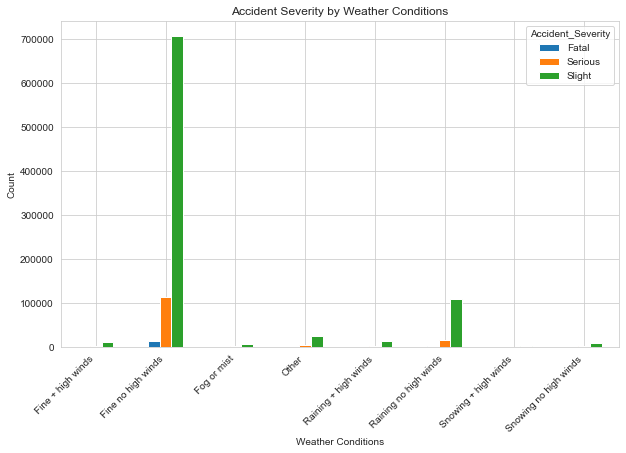

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# data = pd.read_csv('accident_data.csv')

# Select the columns of interest
accident_severity = data['Accident_Severity']
weather_conditions = data['Weather_Conditions']

# Filter out missing values
weather_conditions = weather_conditions[weather_conditions != 'Data Missing']

# Create a dataframe with accident severity and weather conditions
df = pd.DataFrame({'Accident_Severity': accident_severity, 'Weather_Conditions': weather_conditions})

# Group the data by weather conditions and calculate the count of each accident severity category
severity_counts = df.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack()

# Plot the bar chart using seaborn
sns.set_style('whitegrid')
ax = severity_counts.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Count')
ax.set_title('Accident Severity by Weather Conditions')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [33]:
# drop rows with time null: 
data_subset.dropna(subset=['Time'],inplace=True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_22372\1019121934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.dropna(subset=['Time'],inplace=True)


In [51]:
 data_subset.isnull().sum()

Accident_Index                                 0
Accident_Severity                              0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Latitude                                       0
Longitude                                      0
Light_Conditions                               0
authority                                      0
Number_of_Casualties                           0
Road_Surface_Conditions                        0
Road_Type                                      0
Speed_limit                                    0
Time                                           0
Urban_or_Rural_Area                            0
Weather_Conditions                             0
Year                                           0
1st_Road_Class                                 0
Carriageway_Hazards                            0
dtype: int64

In [49]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
#data = pd.read_csv('accident_data.csv')

# Select the columns of interest
accident_severity = data['Accident_Severity']
road_surface_conditions = data['Road_Surface_Conditions']

# Create a contingency table
contingency_table = pd.crosstab(accident_severity, road_surface_conditions)

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between accident severity and road surface conditions.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between accident severity and road surface conditions.")

Reject the null hypothesis. There is a significant relationship between accident severity and road surface conditions.


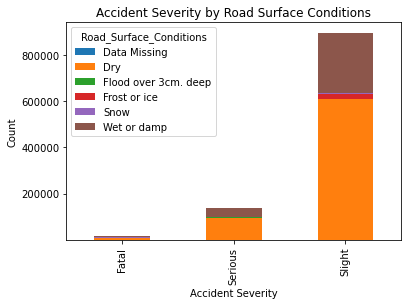

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Select the columns of interest
accident_severity = data['Accident_Severity']
road_surface_conditions = data['Road_Surface_Conditions']

# Create a contingency table
contingency_table = pd.crosstab(accident_severity, road_surface_conditions)

# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True)

# Set the plot labels and title
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Accident Severity by Road Surface Conditions')

# Display the plot
plt.show()

In [120]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
#data = pd.read_csv('accident_data.csv')

# Select the columns of interest
accident_severity = data['Accident_Severity']
road_type = data['Road_Type']

# Create a contingency table
contingency_table = pd.crosstab(accident_severity, road_type)



# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between accident severity and road type.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between accident severity and road type.")
chi2, p_value, dof, expected 

Reject the null hypothesis. There is a significant relationship between accident severity and road type.


(3626.370875385552,
 0.0,
 10,
 array([[1.00444455e+02, 2.19236653e+03, 3.06726913e+02, 9.53205847e+02,
         1.07951029e+04, 1.52153366e+02],
        [9.57187166e+02, 2.08921947e+04, 2.92295940e+03, 9.08359155e+03,
         1.02872119e+05, 1.44994812e+03],
        [6.20536838e+03, 1.35442439e+05, 1.89493137e+04, 5.88882026e+04,
         6.66911778e+05, 9.39989851e+03]]))

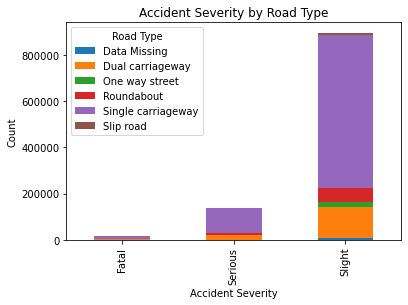

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('accident_data.csv')

# Select the columns of interest
accident_severity = data['Accident_Severity']
road_type = data['Road_Type']

# Create a contingency table
contingency_table = pd.crosstab(accident_severity, road_type)

# Plot the bar chart
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Accident Severity by Road Type')
plt.legend(title='Road Type')

# Show the plot
plt.show()

In [47]:
# Get top 20 authorities
local_authorities_by_collisions = data_subset.authority.value_counts(ascending=False)
local_authorities_by_collisions[:20]


Birmingham            21384
Leeds                 14128
Manchester            11075
Bradford               9727
Liverpool              9326
Sheffield              9180
Westminster            8855
Glasgow City           8760
Bristol, City of       7782
Kirklees               7301
Edinburgh, City of     6672
Barnet                 6574
Lambeth                6498
Doncaster              6340
Leicester              6086
Southwark              5982
Nottingham             5970
Brighton and Hove      5818
Croydon                5815
Cardiff                5612
Name: authority, dtype: int64

<AxesSubplot:>

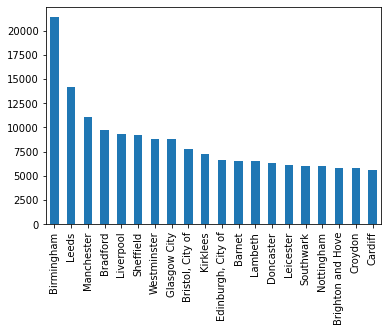

In [48]:
local_authorities_by_collisions[:20].plot(kind='bar')

Birmingham has the most number of collisions (21,384).
The number of collisions per city decreasese exponentially

# Anayze Accident Severity¶

In [42]:
severities = data_subset['Accident_Severity']
severity_levels = severities.unique()
severity_levels

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [43]:
severities.isna().sum() # check if there are any null valu

0

In [44]:
severities.value_counts()

Slight     895797
Serious    138178
Fatal       14500
Name: Accident_Severity, dtype: int64

In [45]:
#Calculate Percentages 
severities.value_counts()*100/len(severities)

Slight     85.438089
Serious    13.178950
Fatal       1.382961
Name: Accident_Severity, dtype: float64

In [ ]:
 #Visualize the accident severity in histogram
severities.value_counts().plot(kind='bar')

# Anayze Date and Time

In [ ]:
data_subset['Date']

In [ ]:
data_subset['Date'].isna().sum()

In [ ]:
#Time: 
times = data_subset.Time
times

In [ ]:
times.isna().sum()

In [ ]:
data_subset.Time.isna().sum()

In [ ]:
# Create a new datetime columns based on the individual values given

data_subset['DateTime'] = data_subset['Date']+' '+ data_subset['Time']
data_subset.head()

In [ ]:
data_subset.DateTime.isna().sum() # make sure the new columns does not contain NA

In [ ]:
import pandas as pd

#data_subset['DateTime'] = pd.to_datetime(data_subset['DateTime'])
data_subset['DateTime'] = pd.to_datetime(data_subset['DateTime'], format='%d-%m-%Y', errors='coerce')


In [ ]:
sns.distplot(data_subset.DateTime.dt.day, bins=31, kde=False, norm_hist=True)
import matplotlib.pyplot as plt

plt.axvline(10.0, 0,color='red')
plt.axvline(13.0, 0,color='red')

# Most accidents occurs between dates 10 - 13 of the month, on first day of the month and last days of the month number of accidents gets down.

In [ ]:
sns.distplot(data_subset.DateTime.dt.day_of_week, bins=7, kde=False, norm_hist=True)

In [ ]:
### Analyze time of occurance of collisions
sns.distplot(data_subset.DateTime.dt.hour, bins=24, kde=False, norm_hist=True)

plt.axvline(8.0, 0,color='red')
plt.axvline(14.0, 0,color='red')
plt.axvline(18.0, 0,color='red')

# Analyze response behaviours of police after collisions

In [ ]:
data_subset.head()

In [ ]:
police_responses = data_subset.Did_Police_Officer_Attend_Scene_of_Accident
police_responses.value_counts()

In [ ]:
#calculate police response by percentages
response_percentages = police_responses.value_counts()*100/len(police_responses)
response_percentages

80.4% of the time police attended to the scene of accident (843,029 collisions)
19.3% of the time police did not attend to the scene of the accidents -(202112) - WHY? - Could the severity matter?
0.3% (3066) of the collisions were reported through self-completion form (No police were needed)

# Analyze the 19.2% accidents where police did not attend.

In [ ]:
collisions_with_no_police_attendance = data_subset[data_subset['Did_Police_Officer_Attend_Scene_of_Accident']==2]
len(collisions_with_no_police_attendance)

In [ ]:
collisions_with_no_police_attendance.Accident_Severity.value_counts()

In [ ]:
# Calculate percentages
collisions_with_no_police_attendance.Accident_Severity.value_counts()*100/len(collisions_with_no_police_attendance)

Probabably the police did not attend because the severity of the collision was slight.
But there are 195 fatal collisions where the police did not attend WHY? - Further analysis is required

In [ ]:
# Calculate percentages
collisions_with_no_police_attendance.Accident_Severity.value_counts()*100/len(collisions_with_no_police_attendance)

In [ ]:
data_subset.Latitude

# Analyze number of casualties

In [ ]:
casualties=data_subset.Number_of_Casualties
casualties
sns.histplot(casualties,log_scale=True)

More than 92% of the accidents involved casualties invloving less than 2 people.
8 percent of the accidents involved large number of casualties ranging from 4 to 43.

In [ ]:
#get high casualty accidents: 
high_casualty = data_subset[data_subset.Number_of_Casualties>5]
high_casualty.head()

In [ ]:
# when do these high casualty collisions occur happen? 
sns.distplot(high_casualty.DateTime.dt.hour, bins=24, kde=False, norm_hist=True)
import matplotlib.pyplot as plt

plt.axvline(13.0, 0,color='red')
plt.axvline(18.0, 0,color='red')

In [ ]:
# Local authorities where these high casualty accidents happens
local_authorities_by_high_collisions = high_casualty.authority.value_counts(ascending=False)
local_authorities_by_high_collisions[:20]

In [ ]:
#identify categorical and numeric features
cat_cols=data_subset.select_dtypes('object').columns
num_cols=data_subset.select_dtypes('number').columns
#drop accident_severity bcuz it will be 

In [ ]:
data_subset.info()

In [ ]:
#label encoder on cat_cols
label_encoder=LabelEncoder()
for cat_cols in cat_cols:
    data_subset[cat_cols]= label_encoder.fit_transform(data_subset[cat_cols])

data_subset.sample(10)

In [ ]:
X=data_subset.drop('Accident_Severity', axis=1)

In [ ]:
#identify dependent and independent variables
X=data_subset.drop('Accident_Severity', axis=1)
X=data_subset.drop('DateTime', axis=1)
y=data_subset.Accident_Severity

In [ ]:
 data_subset.isnull().sum()

In [ ]:
# Create a list of column names to remove
#columns_to_drop = ['Accident_Severity', 'DateTime']
data_subset.drop(columns='DateTime', inplace=True)




In [ ]:
data_subset1= data_subset.iloc[:20000]

In [ ]:
data_subset1.shape

In [ ]:
#identify dependent and independent variables
X=data_subset1.drop('Accident_Severity', axis=1)
y=data_subset1.Accident_Severity

In [ ]:

X.info()

In [ ]:
X.isnull().sum()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df' with a column named 'class'
class_counts = y.value_counts()

# Plotting the class-wise distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class-wise Distribution')
plt.show()

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE oversampling technique
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df' with a column named 'class'
class_counts = y_balanced.value_counts()

# Plotting the class-wise distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class-wise Distribution')
plt.show()

In [ ]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=0)

In [ ]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Scaling=scaler.fit_transform(X_train)
    X_test_after_Scaling=scaler.transform(X_test)
    return X_train_after_Scaling, X_test_after_Scaling

In [ ]:
X_train_after_Scaling,X_test_after_Scaling=Feature_Scaling(X_train, X_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(17,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train_before_Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_after_Scaling)
plt.title('X_train_after_Scaling')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a RandomForestClassifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100)

# Train the model on the scaled training dataset
clf.fit(X_train_after_Scaling, y_train)

# Make predictions on the scaled test dataset
y_pred = clf.predict(X_test_after_Scaling)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a RandomForestClassifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100)

# Train the model on the scaled training dataset
clf.fit(X_train_after_Scaling, y_train)

# Make predictions on the scaled test dataset
y_pred = clf.predict(X_test_after_Scaling)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate the recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Create a RandomForestClassifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100)

# Train the model on the scaled training dataset
clf.fit(X_train_after_Scaling, y_train)

# Make predictions on the scaled test dataset
y_pred_prob = clf.predict_proba(X_test_after_Scaling)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # Use 'ovr' for multi-class problems

print("AUC-ROC Score:", auc_roc)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Create a RandomForestClassifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100)

# Train the model on the scaled training dataset
clf.fit(X_train_after_Scaling, y_train)

# Get predicted probabilities for each class
y_pred_prob = clf.predict_proba(X_test_after_Scaling)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize dictionaries to store the fpr and tpr for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute the ROC curve and AUC for each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curves for each class
plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities for each class stored in y_pred_prob

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # Replace `num_classes` with the actual number of classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(3):  # Replace `num_classes` with the actual number of classes
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Plot the random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Set the plot title and labels
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()







In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Create a RandomForestClassifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100)

# Train the model on the scaled training dataset
clf.fit(X_train_after_Scaling, y_train)

# Get predicted probabilities for each class
y_pred_prob = clf.predict_proba(X_test_after_Scaling)

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=clf.classes_)

# Compute the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the overall false positive rate, true positive rate, and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each class
plt.figure()
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f})'.format(roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot the overall ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = {:.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier
clf = RandomForestClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best parameters
grid_search.fit(X_train_after_Scaling, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier object
clf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Perform grid search on the training dataset
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters of Random model:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for prediction
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Random Model:", accuracy)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Train the AdaBoost model on the training dataset
adaboost_classifier.fit(X_train_after_Scaling, y_train)

# Make predictions on the test dataset
y_pred = adaboost_classifier.predict(X_test_after_Scaling)

# Calculate accuracy

print("AdaBoostClassifier ")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: ", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Create an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier on the scaled training dataset
adaboost_classifier.fit(X_train_after_Scaling, y_train)

# Get predicted probabilities for each class
y_pred_prob = adaboost_classifier.predict_proba(X_test_after_Scaling)

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=adaboost_classifier.classes_)

# Compute the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(adaboost_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the overall false positive rate, true positive rate, and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot the ROC curve for each class
plt.figure()
for i in range(len(adaboost_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f})'.format(roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot the overall ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = {:.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Train the AdaBoost model on the training dataset
adaboost_classifier.fit(X_train_after_Scaling, y_train)

# Calculate the predicted probabilities for each class
y_pred_prob = adaboost_classifier.predict_proba(X_test_after_Scaling)

# Initialize dictionaries to store the FPR, TPR, and thresholds for each class
fpr_dict = {}
tpr_dict = {}
thresholds_dict = {}

# Iterate over each class
for class_label in range(3):  # Replace `num_classes` with the actual number of classes
    # Compute the false positive rate, true positive rate, and thresholds for the current class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, class_label], pos_label=class_label)
    
    # Store the values in the dictionaries
    fpr_dict[class_label] = fpr
    tpr_dict[class_label] = tpr
    thresholds_dict[class_label] = thresholds

# Plot the ROC curves for each class
for class_label in range(3):  # Replace `num_classes` with the actual number of classes
    # Calculate the AUC for the current class
    roc_auc = auc(fpr_dict[class_label], tpr_dict[class_label])
    
    # Plot the ROC curve for the current class
    plt.plot(fpr_dict[class_label], tpr_dict[class_label], label='Class {} (AUC = {:.2f})'.format(class_label, roc_auc))

# Add labels, legend, and display the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Create an AdaBoost classifier with DecisionTree base estimator
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training dataset
grid_search.fit(X_train_after_Scaling, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for prediction
y_pred = best_model.predict(X_test_after_Scaling)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Train the model on the training dataset
logistic_regression.fit(X_train_after_Scaling, y_train)

# Make predictions on the test dataset
y_pred = logistic_regression.predict(X_test_after_Scaling)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: of logistic Regression ", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: ", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtain the predicted labels
y_pred = logistic_regression.predict(X_test_after_Scaling)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()








In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Train the model on the training dataset
logistic_regression.fit(X_train_after_Scaling, y_train)

# Get predicted probabilities for each class
y_pred_prob = logistic_regression.predict_proba(X_test_after_Scaling)

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=logistic_regression.classes_)

# Compute the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(logistic_regression.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the overall false positive rate, true positive rate, and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each class
plt.figure()
for i in range(len(logistic_regression.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f})'.format(roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot the overall ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = {:.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()






In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Train the model on the training dataset
logistic_regression.fit(X_train_after_Scaling, y_train)

# Make predictions on the test dataset
y_pred_prob = logistic_regression.predict_proba(X_test_after_Scaling)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print("AUC:", roc_auc)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Train the model on the training dataset
logistic_regression.fit(X_train_after_Scaling, y_train)

# Make predictions on the test dataset
y_pred_prob = logistic_regression.predict_proba(X_test_after_Scaling)

# Initialize dictionaries to store the FPR, TPR, and thresholds for each class
fpr_dict = {}
tpr_dict = {}
thresholds_dict = {}

# Iterate over each class
for class_label in range(3):  # Replace `3` with the actual number of classes
    # Compute the false positive rate, true positive rate, and thresholds for the current class
    fpr, tpr, thresholds = roc_curve(y_test == class_label, y_pred_prob[:, class_label])
    
    # Store the values in the dictionaries
    fpr_dict[class_label] = fpr
    tpr_dict[class_label] = tpr
    thresholds_dict[class_label] = thresholds

# Plot the ROC curves for each class
for class_label in range(3):  # Replace `3` with the actual number of classes
    # Calculate the AUC for the current class
    roc_auc = auc(fpr_dict[class_label], tpr_dict[class_label])
    
    # Plot the ROC curve for the current class
    plt.plot(fpr_dict[class_label], tpr_dict[class_label], label='Class {} (AUC = {:.2f})'.format(class_label, roc_auc))

# Add labels, legend, and display the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5)

# Perform grid search on the training dataset
grid_search.fit(X_train_after_Scaling, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for prediction
y_pred = best_model.predict(X_test_after_Scaling)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the model
clf.fit(X_train_after_Scaling, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_after_Scaling)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the model
clf.fit(X_train_after_Scaling, y_train)

# Make predictions on the test set
y_pred_prob = clf.predict_proba(X_test_after_Scaling)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print("AUC:", roc_auc)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the model
clf.fit(X_train_after_Scaling, y_train)

# Make predictions on the test set
y_pred_prob = clf.predict_proba(X_test_after_Scaling)

# Initialize dictionaries to store the FPR, TPR, and thresholds for each class
fpr_dict = {}
tpr_dict = {}
thresholds_dict = {}

# Iterate over each class
for class_label in range(3):  # Replace `num_classes` with the actual number of classes
    # Compute the false positive rate, true positive rate, and thresholds for the current class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, class_label], pos_label=class_label)
    
    # Store the values in the dictionaries
    fpr_dict[class_label] = fpr
    tpr_dict[class_label] = tpr
    thresholds_dict[class_label] = thresholds

# Plot the ROC curves for each class
for class_label in range(3):  # Replace `num_classes` with the actual number of classes
    # Calculate the AUC for the current class
    roc_auc = auc(fpr_dict[class_label], tpr_dict[class_label])
    
    # Plot the ROC curve for the current class
    plt.plot(fpr_dict[class_label], tpr_dict[class_label], label='Class {} (AUC = {:.2f})'.format(class_label, roc_auc))

# Add labels, legend, and display the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multi-class')
plt.legend(loc="lower right")
plt.show()






In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the model
clf.fit(X_train_after_Scaling, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_after_Scaling)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)






In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_after_Scaling, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_after_Scaling, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print("Best Score:", best_score)

In [ ]:


from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the model
clf.fit(X_train_after_Scaling, y_train)

# Get predicted probabilities for each class
y_pred_prob = clf.predict_proba(X_test_after_Scaling)

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=clf.classes_)

# Compute the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each class
plt.figure()
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f})'.format(roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot the micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = {:.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create an SVM classifier
svm_classifier = SVC()

# Train the model on the training dataset
svm_classifier.fit(X_train_after_Scaling, y_train)

# Make predictions on the test dataset
y_pred = svm_classifier.predict(X_test_after_Scaling)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm_classifier = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training dataset
grid_search.fit(X_train_after_Scaling, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters on the full training dataset
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train_after_Scaling, y_train)

# Make predictions on the test dataset using the best model
y_pred = best_svm_classifier.predict(X_test_after_Scaling)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the best parameters, best score, evaluation metrics, and confusion matrix
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Create an SVM classifier
svm_classifier = SVC(probability=True)

# Fit the SVM classifier to the training data
svm_classifier.fit(X_train_after_Scaling, y_train)

# Get predicted probabilities for each class
y_pred_prob = svm_classifier.predict_proba(X_test_after_Scaling)

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=svm_classifier.classes_)

# Compute the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(svm_classifier.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f})'.format(roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot the micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = {:.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [None, 5, 10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_train_after_Scaling, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


# Train the model with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train_after_Scaling, y_train)

# Make predictions on the test dataset
y_pred = best_decision_tree.predict(X_test_after_Scaling)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics, best hyperparameters, and confusion matrix
print("Best Hyperparameters:", best_params)
print("Best score:", grid_search.best_score_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Compute the predicted probabilities for each class
y_pred_prob = best_decision_tree.predict_proba(X_test_after_Scaling)

# Obtain the unique classes from y_test
classes = np.unique(y_test)

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, cls in enumerate(classes):
    y_test_bin = label_binarize(y_test, classes=[cls])
    y_pred_prob_cls = y_pred_prob[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_pred_prob_cls)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average false positive rate, true positive rate, and AUC
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_prob_bin = label_binarize(y_pred, classes=classes)
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot the ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {})'.format(cls))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc_micro))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()